![人工智慧 - 自由團隊](https://raw.githubusercontent.com/chenkenanalytic/img/master/af/aifreeteam.png)
# 【章節三】單元十一 回歸模型實作（二）支援向量回歸（SVR）
# 注意事項
* [[Kaggle Link](https://www.kaggle.com/shree1992/housedata)] 需先下載 data.csv 並上傳到此虛擬機(VM, Virtual Machine)上

## 步驟一: 讀取房價預測資料集

In [29]:
# 引入這部分會使用到的套件
import pandas as pd

Dataset = pd.read_csv("data.csv")
Dataset.head() # 看前五筆資料

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 步驟二: 資料視覺化與特徵工程
* 處理缺失值
* 視覺化後再進行簡單的特徵工程

In [30]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位 {col} 的缺失值共有 {Dataset[col].isnull().sum()} 筆")

第1個欄位 date 的缺失值共有 0 筆
第2個欄位 price 的缺失值共有 0 筆
第3個欄位 bedrooms 的缺失值共有 0 筆
第4個欄位 bathrooms 的缺失值共有 0 筆
第5個欄位 sqft_living 的缺失值共有 0 筆
第6個欄位 sqft_lot 的缺失值共有 0 筆
第7個欄位 floors 的缺失值共有 0 筆
第8個欄位 waterfront 的缺失值共有 0 筆
第9個欄位 view 的缺失值共有 0 筆
第10個欄位 condition 的缺失值共有 0 筆
第11個欄位 sqft_above 的缺失值共有 0 筆
第12個欄位 sqft_basement 的缺失值共有 0 筆
第13個欄位 yr_built 的缺失值共有 0 筆
第14個欄位 yr_renovated 的缺失值共有 0 筆
第15個欄位 street 的缺失值共有 0 筆
第16個欄位 city 的缺失值共有 0 筆
第17個欄位 statezip 的缺失值共有 0 筆
第18個欄位 country 的缺失值共有 0 筆


### 第一個欄位(date)

In [31]:
# 瞭解資料分布
print(Dataset["date"])

#for each_date in Dataset["date"]:
#  print(each_date)

0       2014-05-02 00:00:00
1       2014-05-02 00:00:00
2       2014-05-02 00:00:00
3       2014-05-02 00:00:00
4       2014-05-02 00:00:00
               ...         
4595    2014-07-09 00:00:00
4596    2014-07-09 00:00:00
4597    2014-07-09 00:00:00
4598    2014-07-10 00:00:00
4599    2014-07-10 00:00:00
Name: date, Length: 4600, dtype: object


In [32]:
# 進行特徵工程，對原始資料進行映射(mapping)
mapping_rule = {"05": "Time_A", "06": "Time_B", "07": "Time_C"}
Dataset["date"] = Dataset.apply(lambda row: mapping_rule[row["date"].split("-")[1]], axis=1)

# 瞭解 date 屬於 Time_A, Time_B, Time_C 的數量
print(Dataset["date"].value_counts())

Dataset.head()

Time_B    2179
Time_A    1768
Time_C     653
Name: date, dtype: int64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,Time_A,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,Time_A,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,Time_A,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,Time_A,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,Time_A,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### 第二個欄位(price)

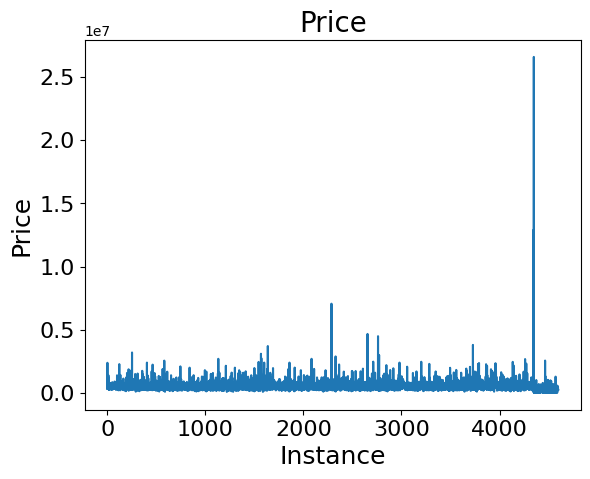

In [33]:
# 使用 matplotlib 進行視覺化
import matplotlib.pyplot as plt

plt.plot(Dataset["price"])
plt.title("Price", fontsize=20)
plt.xlabel("Instance", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# 觀察到 0.5 * 10^7 這個數字可能可以當作是 outlier 的臨界值

In [34]:
# 把屬於 Outlier 的資料進行標記
Dataset["Outlier"] = Dataset.apply(lambda row: True if row["price"] > 0.5e7 else False, axis=1)
print(Dataset["Outlier"].value_counts())

Dataset.head()

False    4597
True        3
Name: Outlier, dtype: int64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier
0,Time_A,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
1,Time_A,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,False
2,Time_A,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,Time_A,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,False
4,Time_A,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False


In [35]:
# 檢查是否有 price 等於 0 的情況
(Dataset["price"] == 0).sum()

# 按理判斷，房價不該為 0，因此也把此情況標記為 Outlier
Dataset["Outlier"] = Dataset.apply(lambda row: True if row["price"] == 0 else row["Outlier"], axis=1)
print(Dataset["Outlier"].value_counts())

False    4548
True       52
Name: Outlier, dtype: int64


In [36]:
# 把屬於 Outlier 的資料 drop 掉
Undropped_Data = (Dataset["Outlier"] == False)
Dataset = Dataset[Undropped_Data]
Dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier
0,Time_A,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
1,Time_A,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,False
2,Time_A,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,Time_A,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,False
4,Time_A,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False


### 第三個欄位(bedrooms)

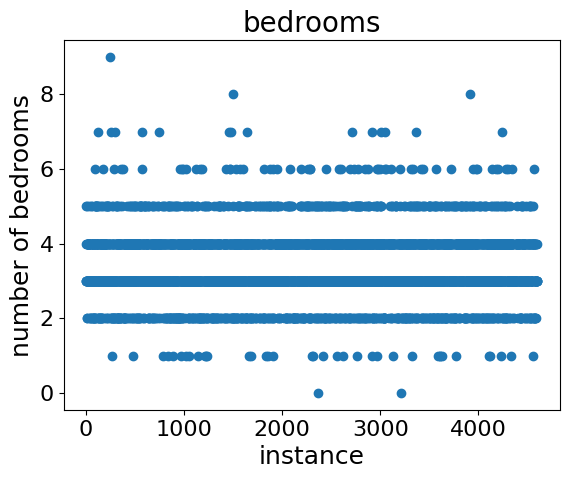

In [37]:
import matplotlib.pyplot as plt

plt.plot(Dataset["bedrooms"], "o")
plt.title("bedrooms", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of bedrooms", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第四個欄位(bathrooms)

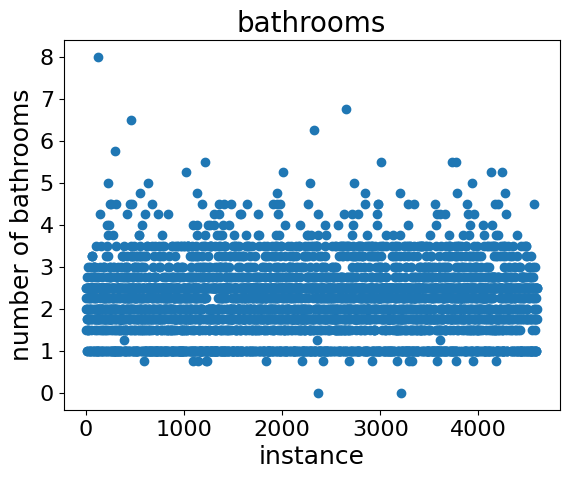

In [38]:
import matplotlib.pyplot as plt

plt.plot(Dataset["bathrooms"], "o")
plt.title("bathrooms", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of bathrooms", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第五個欄位(sqft_living)

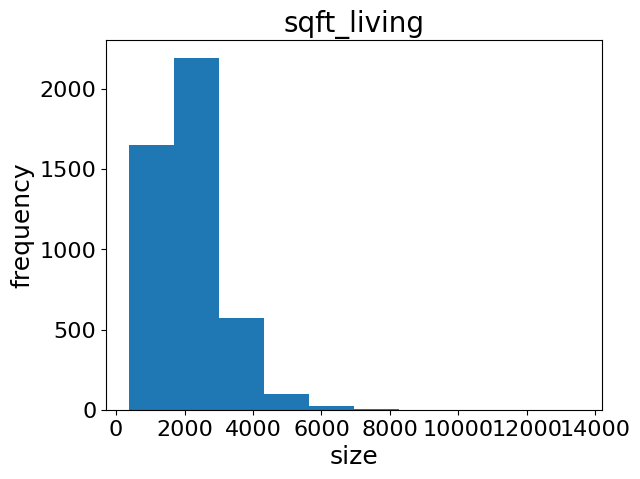

In [39]:
import matplotlib.pyplot as plt

plt.hist(Dataset["sqft_living"])
plt.title("sqft_living", fontsize=20)
plt.xlabel("size", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第六個欄位(sqft_lot)

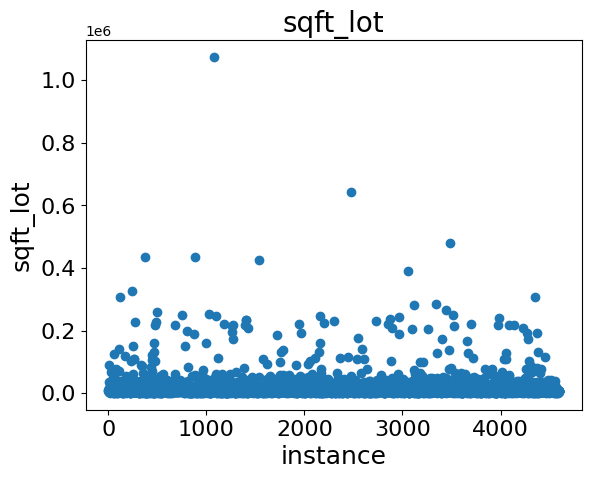

In [40]:
import matplotlib.pyplot as plt

plt.plot(Dataset["sqft_lot"], "o")
#plt.hist(Dataset["sqft_lot"],)
plt.title("sqft_lot", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("sqft_lot", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第七個欄位(floors)

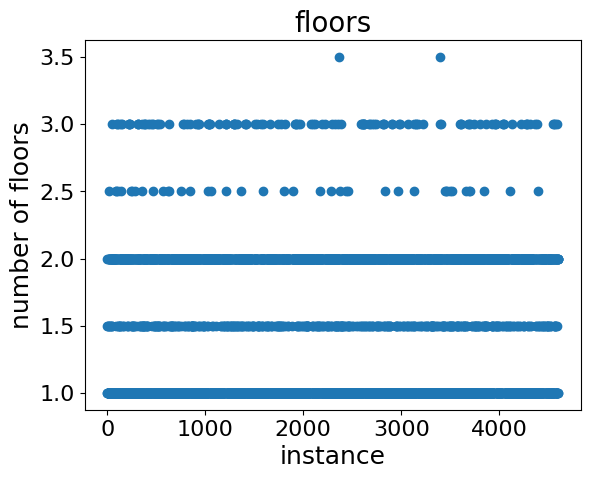

In [41]:
import matplotlib.pyplot as plt

plt.plot(Dataset["floors"], "o")
plt.title("floors", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of floors", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第八個欄位(waterfront)

In [42]:
Dataset["waterfront"].value_counts()

0    4519
1      29
Name: waterfront, dtype: int64

### 第九個欄位(view)

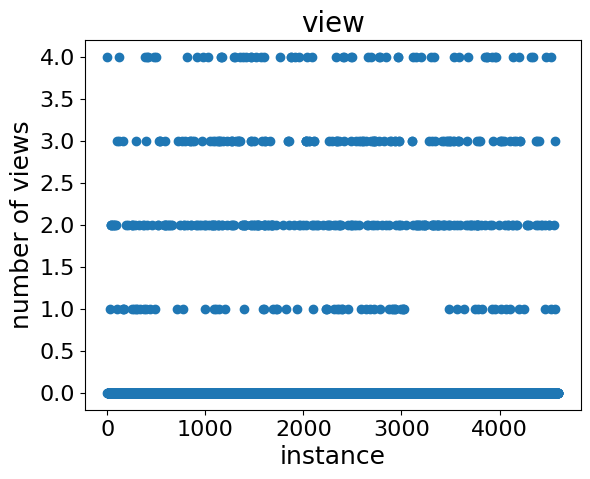

In [43]:
import matplotlib.pyplot as plt

plt.plot(Dataset["view"], "o")
plt.title("view", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of views", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第十個欄位(condition)

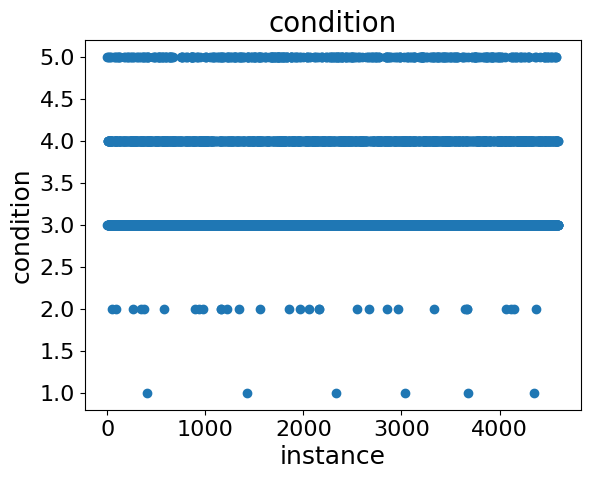

In [44]:
import matplotlib.pyplot as plt

plt.plot(Dataset["condition"], "o")
plt.title("condition", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("condition", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第十一個欄位(sqft_above)

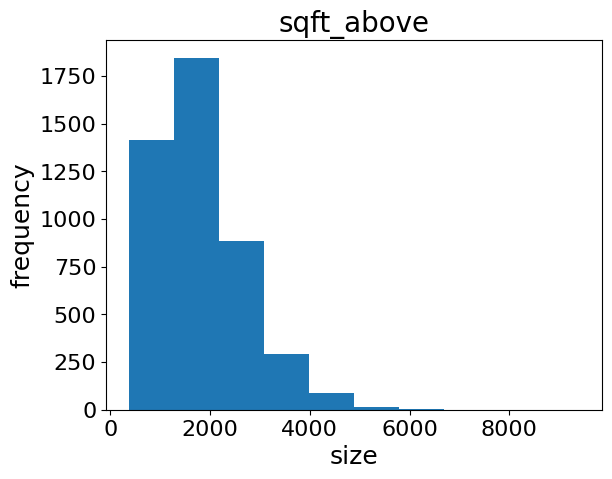

In [45]:
import matplotlib.pyplot as plt

#plt.plot(Dataset["sqft_above"], "o")
plt.hist(Dataset["sqft_above"])
plt.title("sqft_above", fontsize=20)
plt.xlabel("size", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第十二個欄位(sqft_basement)

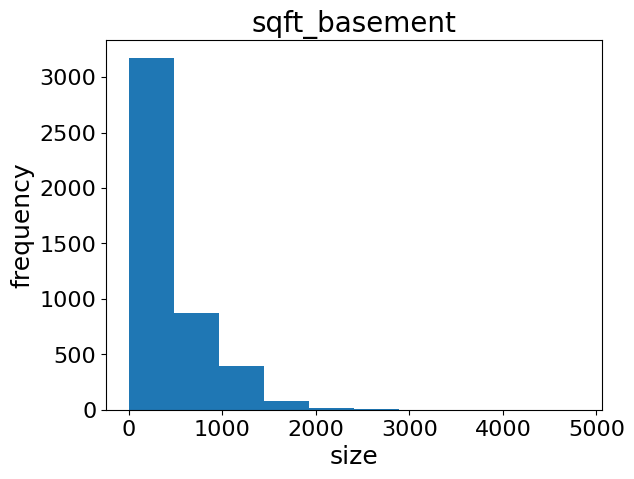

In [46]:
import matplotlib.pyplot as plt

plt.hist(Dataset["sqft_basement"])
plt.title("sqft_basement", fontsize=20)
plt.xlabel("size", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第十三個欄位(yr_built)

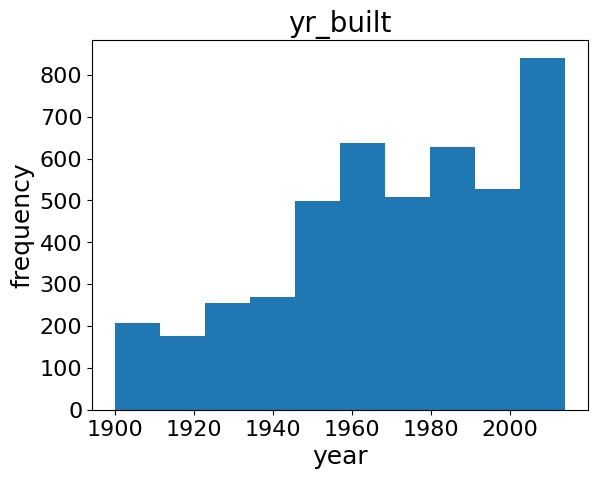

In [47]:
import matplotlib.pyplot as plt

plt.hist(Dataset["yr_built"])
plt.title("yr_built", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第十四個欄位(yr_renovated)

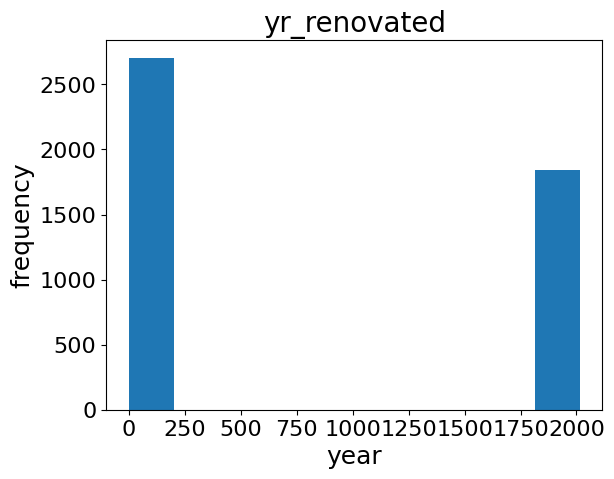

0       2705
2000     169
2003     150
2009     107
2001     104
2005      94
2004      77
2014      72
2006      66
2013      61
1994      57
1923      55
1989      55
2011      54
2008      45
2012      45
1988      43
1983      40
2002      40
1998      39
1993      39
1999      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1982      22
1996      21
1972      17
1990      16
1956      15
1963      12
1969      11
1984       9
1968       9
1970       9
1954       8
1945       7
2007       7
1974       6
1934       6
1986       5
1958       5
1971       5
1978       3
1995       2
1955       2
1980       2
1913       1
1991       1
1948       1
1953       1
1960       1
1987       1
1966       1
1981       1
1977       1
Name: yr_renovated, dtype: int64


In [48]:
import matplotlib.pyplot as plt

plt.hist(Dataset["yr_renovated"])
plt.title("yr_renovated", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# 釐清為何左側靠近0處有資料
print(Dataset["yr_renovated"].value_counts())

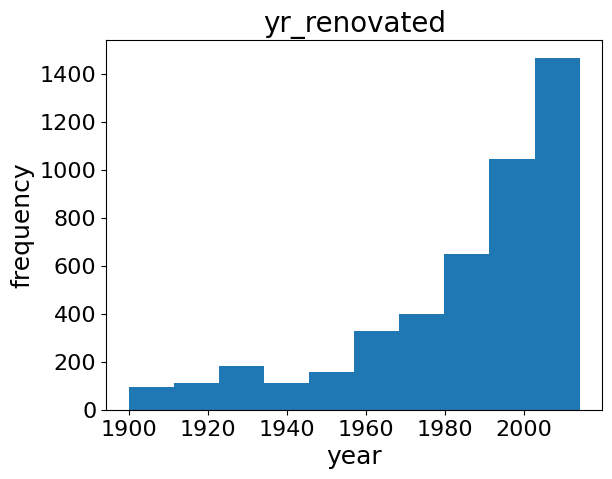

In [49]:
# 發現有一些 yr_renovated 是 0 表示他們都沒有翻新過，然而他們至少應該要是 yr_built
Dataset["yr_renovated"] = Dataset.apply(lambda row: row["yr_built"] if row["yr_renovated"] == 0 else row["yr_renovated"], axis=1)

import matplotlib.pyplot as plt

plt.hist(Dataset["yr_renovated"])
plt.title("yr_renovated", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 第十五個欄位(street	)

In [50]:
# 發現 street 的數量非常的多，因此選擇 drop 掉
print(len(Dataset.street.unique()))
Dataset = Dataset.drop(["street"], axis=1)

4473


### 第十六個欄位(city)

In [51]:
Dataset["city"].value_counts()

Seattle                1560
Renton                  291
Bellevue                280
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    183
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific             

### 第十七個欄位(statezip)

In [52]:
Dataset["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    129
WA 98006    109
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

### 第十八個欄位(country)

In [53]:
Dataset["country"].value_counts()

# 發現大家都是 USA，所以可以 Drop 掉
# 在這邊一併把 Outlier 這個欄位 Drop 掉
Dataset = Dataset.drop(["country", "Outlier"], axis=1)

## 步驟三: 辨識 數值型與類別型特徵

In [54]:
numerical_attributes = []
categorical_attributes = []

for attr in Dataset.columns:
  #print(Dataset[attr].dtypes)

  attr_type = Dataset[attr].dtypes
  if attr_type == "float64" or attr_type == "int64":
    numerical_attributes.append(attr)
  elif attr_type == "object":
    categorical_attributes.append(attr)

numerical_attributes.remove("price")

print(f"數值型的 Attributes 有: {numerical_attributes}")
print(f"類別型的 Attributes 有: {categorical_attributes}")

數值型的 Attributes 有: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
類別型的 Attributes 有: ['date', 'city', 'statezip']


## 步驟四: 進行 One-Hot Encoding

In [55]:
# 使用 pandas 的 get_dummies，可以迅速的對 Dataset 中屬於類別型的欄位進行 One-Hot Encoding

print(f"One-Hot Encoding 前有 {Dataset.shape[1]} 個欄位")
One_Hot_Dataset = pd.get_dummies(Dataset)
print(f"One-Hot Encoding 後有 {One_Hot_Dataset.shape[1]} 個欄位")
One_Hot_Dataset.head()

One-Hot Encoding 前有 16 個欄位
One-Hot Encoding 後有 137 個欄位


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


## 步驟五: 進行資料切分

In [56]:
# 引入這部分會使用到的套件
from sklearn.model_selection import train_test_split

# 區分 X 與 Y
Y = One_Hot_Dataset["price"]
X = One_Hot_Dataset.drop(["price"], axis=1)

# 進行資料集切分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3638, 136)
(3638,)
(910, 136)
(910,)


## 步驟六: 進行 Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
# 除了在多項式回歸模型有使用到的 MinMaxScaler
# 還有什麼工具可以用來調整數值資料的 range 呢?
from sklearn.preprocessing import StandardScaler

# 取出 Training Dataset 和 Testing Dataset 的數值型資料
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

# 僅使用 training dataset 的資料去找到 mapping 的 rule ，大家知道為什麼嗎?
x_scaler = MinMaxScaler().fit(X_train_numerical)

# 使用 scaler 對 training 與 testing dataset 的數值型資料進行 transform
X_train_numerical_trans = x_scaler.transform(X_train_numerical)
X_test_numerical_trans = x_scaler.transform(X_test_numerical)
# 對數值型欄位的資料進行覆寫
X_train[numerical_attributes] = X_train_numerical_trans
X_test[numerical_attributes] = X_test_numerical_trans

# 相較於上 Unit06 - 09 的 Notebook，這本 Notebook 多了下面這些操作
# 針對 Y 做 Feature Scaling
# 先按照直覺做，將會遇到 Error，我們一步一步解決
y_scaler = StandardScaler().fit(Y_train.to_numpy().reshape(-1,1))
Y_train_trans = y_scaler.transform(Y_train.to_numpy().reshape(-1,1))
Y_test_trans = y_scaler.transform(Y_test.to_numpy().reshape(-1,1))

## 步驟七: 進行支援向量回歸模型擬合

In [65]:
# 引入這部分會使用到的套件
from sklearn.svm import SVR

# 訓練支援向量回歸模型
# 參數(parameter)
# kernel: "rbf", "sigmoid", "polynomial"
# c: ... 0.01, 0.1, 1, 10, 100, ...
# gamma: ..., 0.01, 0.1, 1, 10, 100, ...
# degree: 只有 使用 polynomial kernal 的時候需要設定這個參數
#
#SVR_Algorithm = SVR(kernel="poly", C=10, gamma=0.1, degree=3)
SVR_Model = SVR(kernel="rbf", C=10, gamma=0.1)
SVR_Model.fit(X_train, Y_train_trans.reshape(-1))

SVR(C=10, gamma=0.1)

## 步驟八: 進行預測與評估

In [74]:
# 使用訓練的支援向量回歸模型進行預測 (on validation dataset)
SVR_Predictions = SVR_Model.predict(X_test)

# 記得要做 inverse transform 在預測值上
# 先按照直覺做，將會遇到 Error，我們一步一步解決
SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
y_test_inv = y_scaler.inverse_transform(Y_test_trans.reshape(-1,1))

Total_Error=0
# 列印出預測結果與正確解答
counter = 0
for pred, ans in zip(SVR_Predictions_inv.reshape(-1), y_test_inv.reshape(-1)):
  if counter < 50:
    print(f"第{counter+1}筆預測結果: {round(pred)} vs. 實際答案: {round(ans)}")

  # 挑出特別不合理的預測值
  if abs(pred-ans) > 1e10:
    print(f"第{counter+1}筆預測值較為異常{round(pred)}，而答案為{round(ans)}")
  else:
    Total_Error = Total_Error + (abs(pred-ans))
  counter = counter + 1

print(f"\n平均誤差值是 {round(Total_Error/len(SVR_Predictions))}")

第1筆預測結果: 238093 vs. 實際答案: 246000
第2筆預測結果: 576964 vs. 實際答案: 530000
第3筆預測結果: 277045 vs. 實際答案: 306000
第4筆預測結果: 411634 vs. 實際答案: 417838
第5筆預測結果: 226363 vs. 實際答案: 221000
第6筆預測結果: 468193 vs. 實際答案: 465000
第7筆預測結果: 590280 vs. 實際答案: 550000
第8筆預測結果: 648168 vs. 實際答案: 398750
第9筆預測結果: 708755 vs. 實際答案: 895000
第10筆預測結果: 695900 vs. 實際答案: 799950
第11筆預測結果: 275016 vs. 實際答案: 259586
第12筆預測結果: 483016 vs. 實際答案: 478000
第13筆預測結果: 551087 vs. 實際答案: 550000
第14筆預測結果: 420057 vs. 實際答案: 440000
第15筆預測結果: 562406 vs. 實際答案: 545000
第16筆預測結果: 272494 vs. 實際答案: 329950
第17筆預測結果: 447691 vs. 實際答案: 375000
第18筆預測結果: 1073202 vs. 實際答案: 879950
第19筆預測結果: 693827 vs. 實際答案: 720000
第20筆預測結果: 358718 vs. 實際答案: 320000
第21筆預測結果: 764770 vs. 實際答案: 730000
第22筆預測結果: 781513 vs. 實際答案: 860000
第23筆預測結果: 708974 vs. 實際答案: 675000
第24筆預測結果: 450827 vs. 實際答案: 487585
第25筆預測結果: 330307 vs. 實際答案: 450000
第26筆預測結果: 592465 vs. 實際答案: 410000
第27筆預測結果: 509140 vs. 實際答案: 490000
第28筆預測結果: 517469 vs. 實際答案: 475000
第29筆預測結果: 552744 vs. 實際答案: 649000
第30筆預測結果: 243193 vs. 實

## 步驟九：實驗不同的參數組合

In [ ]:
Y_test

In [80]:
def test_SVR_parameter(kernel, C, gamma):
  # 實例化演算法
  SVR_Model = SVR(kernel=kernel, C=C, gamma=gamma)

  # 訓練模型
  SVR_Model.fit(X_train,Y_train_trans.reshape(-1))

  # 評估模型
  # 使用訓練的支援向量回歸模型進行預測 (on validation dataset)
  SVR_Predictions = SVR_Model.predict(X_test)

  # 記得要做 inverse transform 在預測值上
  SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))


  Total_Error=0
  # 列印出預測結果與正確解答
  counter = 0
  for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test.to_numpy().reshape(-1)):
    # if counter < 50:
    #   print(f"第{counter}筆預測結果: {round(pred)} vs. 實際答案: {round(ans)}")

    # 挑出特別不合理的預測值
    if abs(pred-ans) > 1e10:
      print(f"第{counter}筆預測值較為異常{round(pred)}，而答案為{round(ans)}")
    else:
      Total_Error = Total_Error + (abs(pred-ans))
    counter = counter + 1

  print(f"\n[C={C}, Gamma={gamma}]平均誤差值是 {round(Total_Error/len(SVR_Predictions))}")

In [81]:
kernel = "rbf"
C_list = [0.01, 0.1, 1, 10, 100]
Gamma_list = [0.01, 0.1, 1, 10, 100]
for C in C_list:
  for Gamma in Gamma_list:
    test_SVR_parameter(kernel,C,Gamma)


[C=0.01, Gamma=0.01]平均誤差值是 203816

[C=0.01, Gamma=0.1]平均誤差值是 173227

[C=0.01, Gamma=1]平均誤差值是 185492

[C=0.01, Gamma=10]平均誤差值是 203777

[C=0.01, Gamma=100]平均誤差值是 209695

[C=0.1, Gamma=0.01]平均誤差值是 161005

[C=0.1, Gamma=0.1]平均誤差值是 108260

[C=0.1, Gamma=1]平均誤差值是 130896

[C=0.1, Gamma=10]平均誤差值是 173706

[C=0.1, Gamma=100]平均誤差值是 202807

[C=1, Gamma=0.01]平均誤差值是 103470

[C=1, Gamma=0.1]平均誤差值是 88290

[C=1, Gamma=1]平均誤差值是 102939

[C=1, Gamma=10]平均誤差值是 144065

[C=1, Gamma=100]平均誤差值是 195443

[C=10, Gamma=0.01]平均誤差值是 90413

[C=10, Gamma=0.1]平均誤差值是 87154

[C=10, Gamma=1]平均誤差值是 103546

[C=10, Gamma=10]平均誤差值是 150188

[C=10, Gamma=100]平均誤差值是 209596

[C=100, Gamma=0.01]平均誤差值是 88496

[C=100, Gamma=0.1]平均誤差值是 91977

[C=100, Gamma=1]平均誤差值是 112599

[C=100, Gamma=10]平均誤差值是 153042

[C=100, Gamma=100]平均誤差值是 210307
